In [502]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import KFold 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [466]:
german_credit= pd.read_excel("german_credit_data.xlsx")
german_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


## EDA

In [467]:
german_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [468]:
german_credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


<AxesSubplot:xlabel='Age', ylabel='Density'>

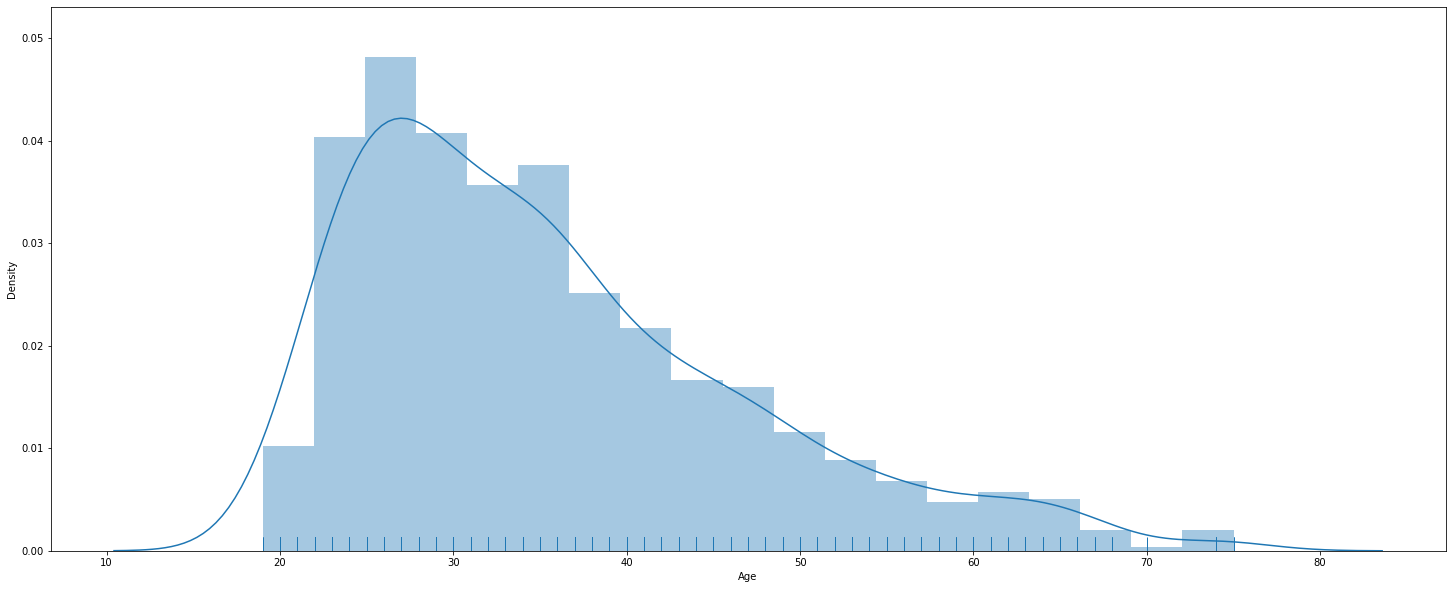

In [469]:
plt.figure(figsize=(25, 10))
sns.distplot(german_credit.Age, hist=True, rug=True)

<AxesSubplot:>

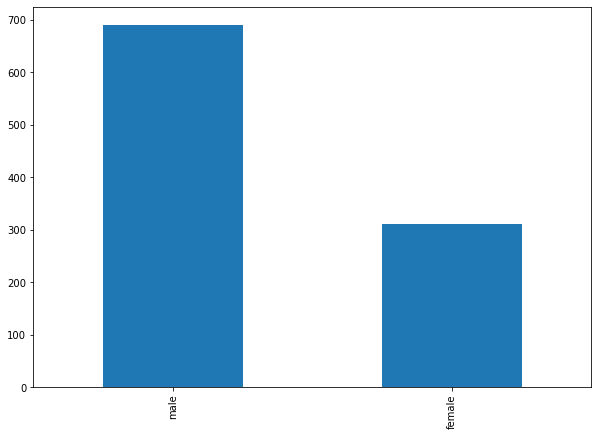

In [470]:
plt.figure(figsize=(10, 7))
german_credit.Sex.value_counts().plot.bar()

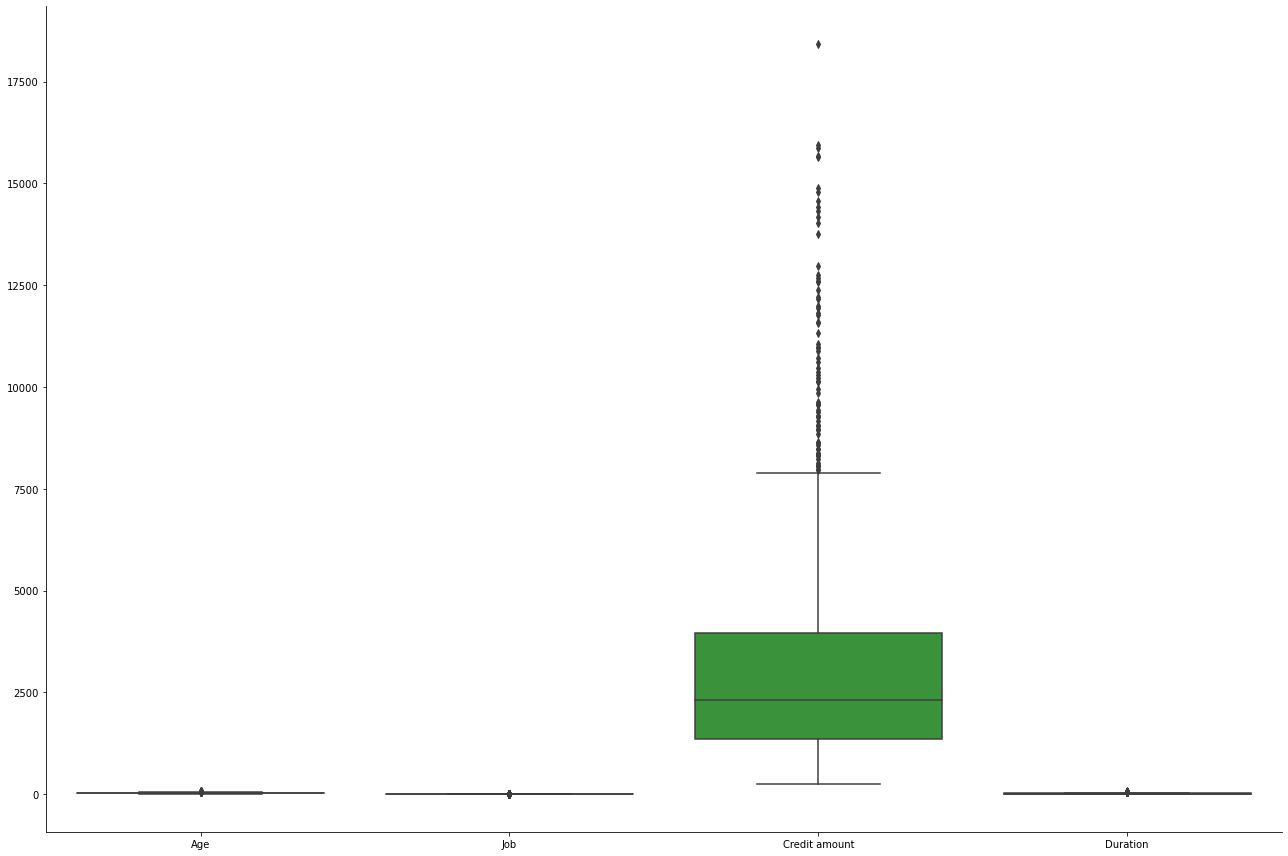

In [471]:
sns.factorplot(data=german_credit, kind='box', size=12, aspect=1.5)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

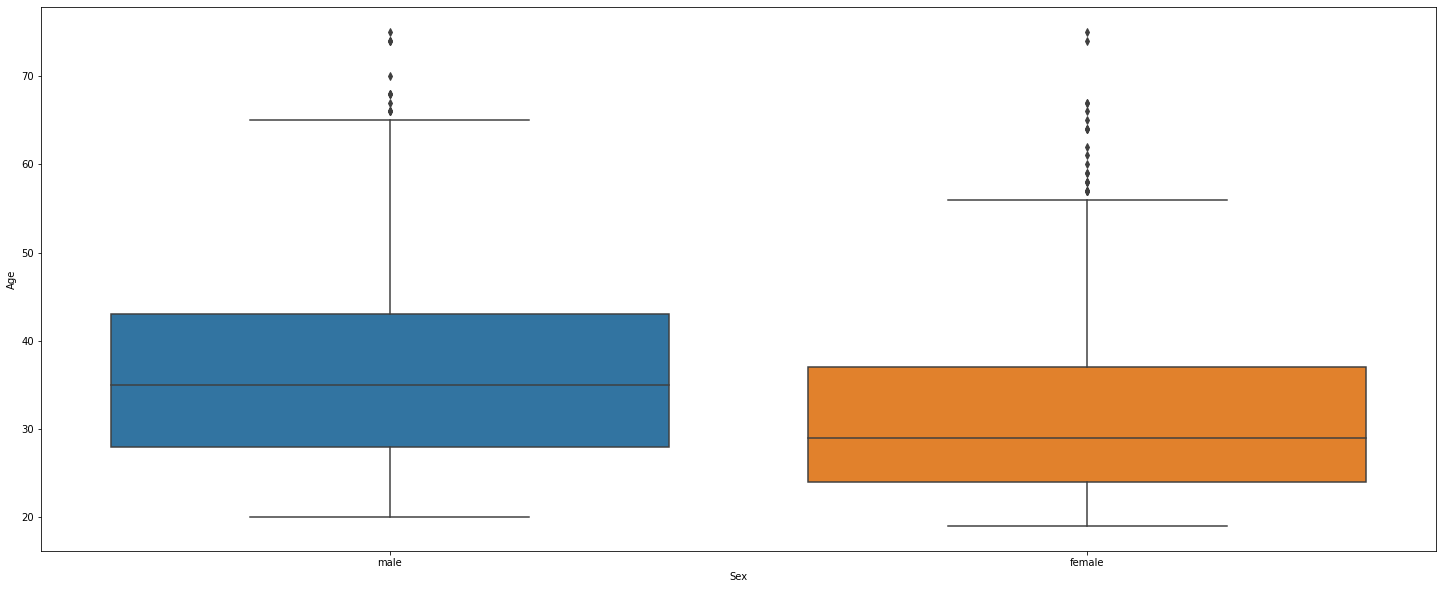

In [472]:
plt.figure(figsize=(25, 10))
sns.boxplot(x="Sex", y="Age", data=german_credit)

<AxesSubplot:xlabel='Checking account', ylabel='Credit amount'>

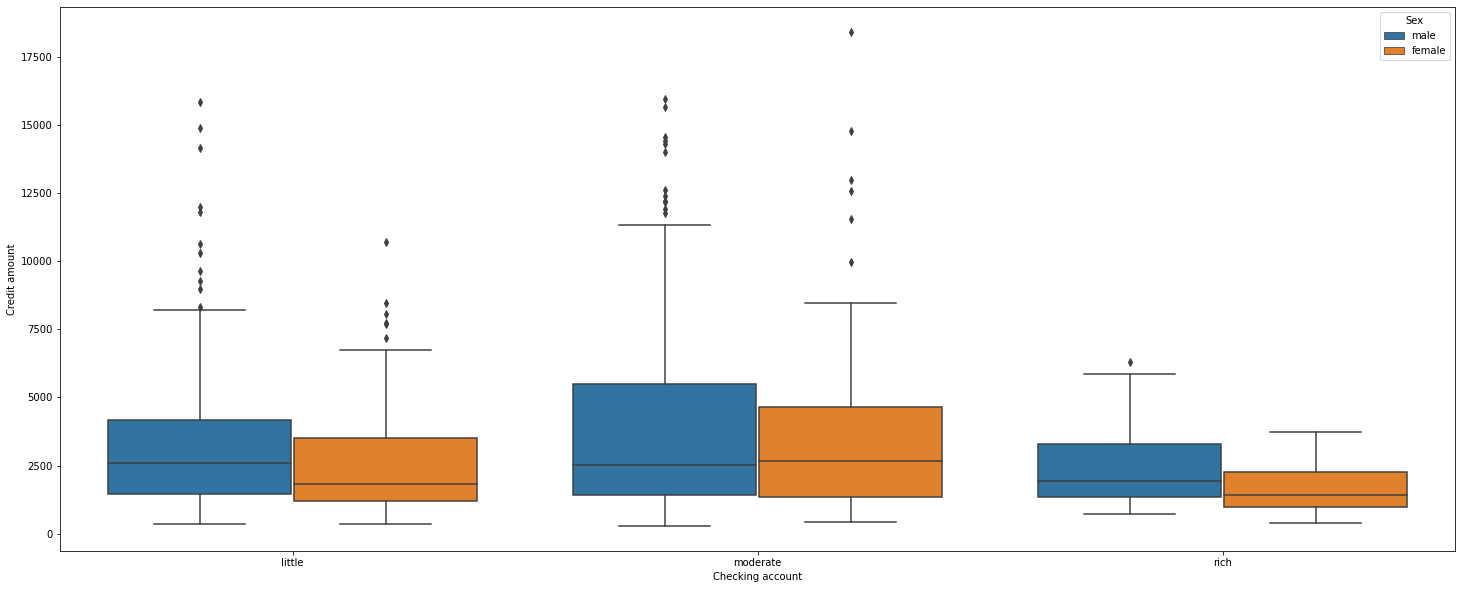

In [473]:
plt.figure(figsize=(25, 10))
sns.boxplot(x="Checking account", y="Credit amount", hue='Sex',data=german_credit)

<AxesSubplot:xlabel='Job', ylabel='Credit amount'>

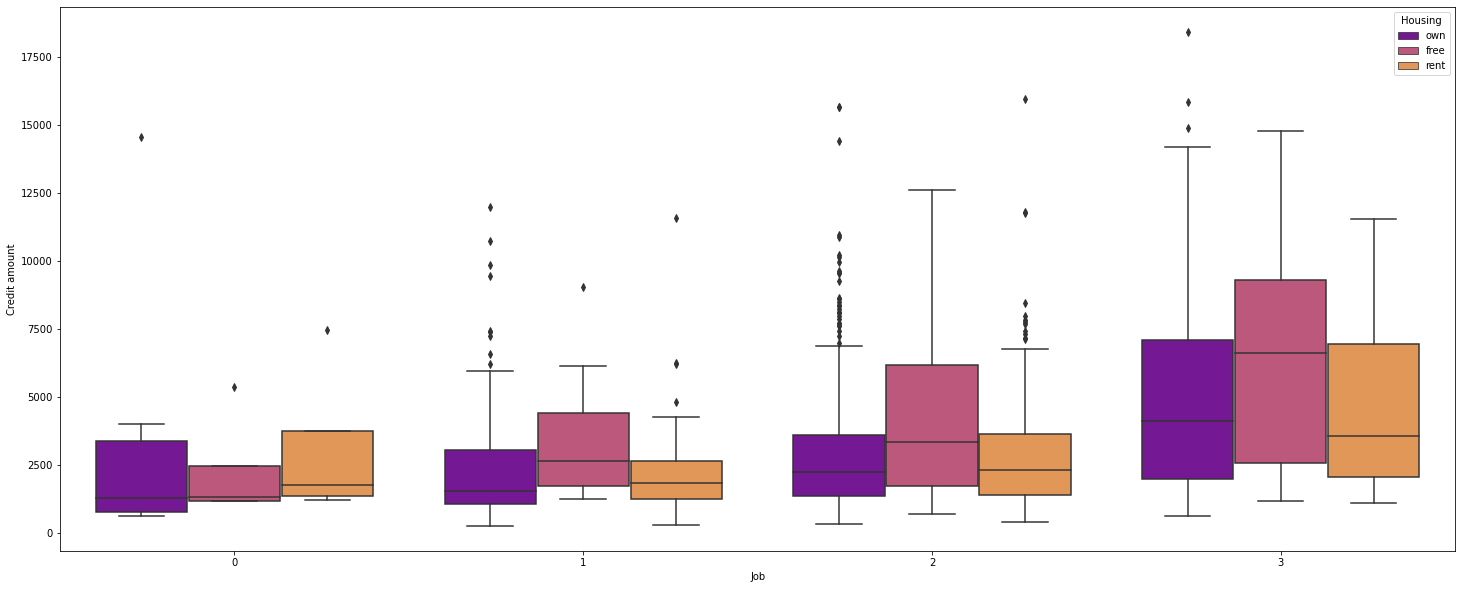

In [474]:
plt.figure(figsize=(25, 10))
sns.boxplot(x="Job", y="Credit amount", hue='Housing', data=german_credit, palette="plasma")

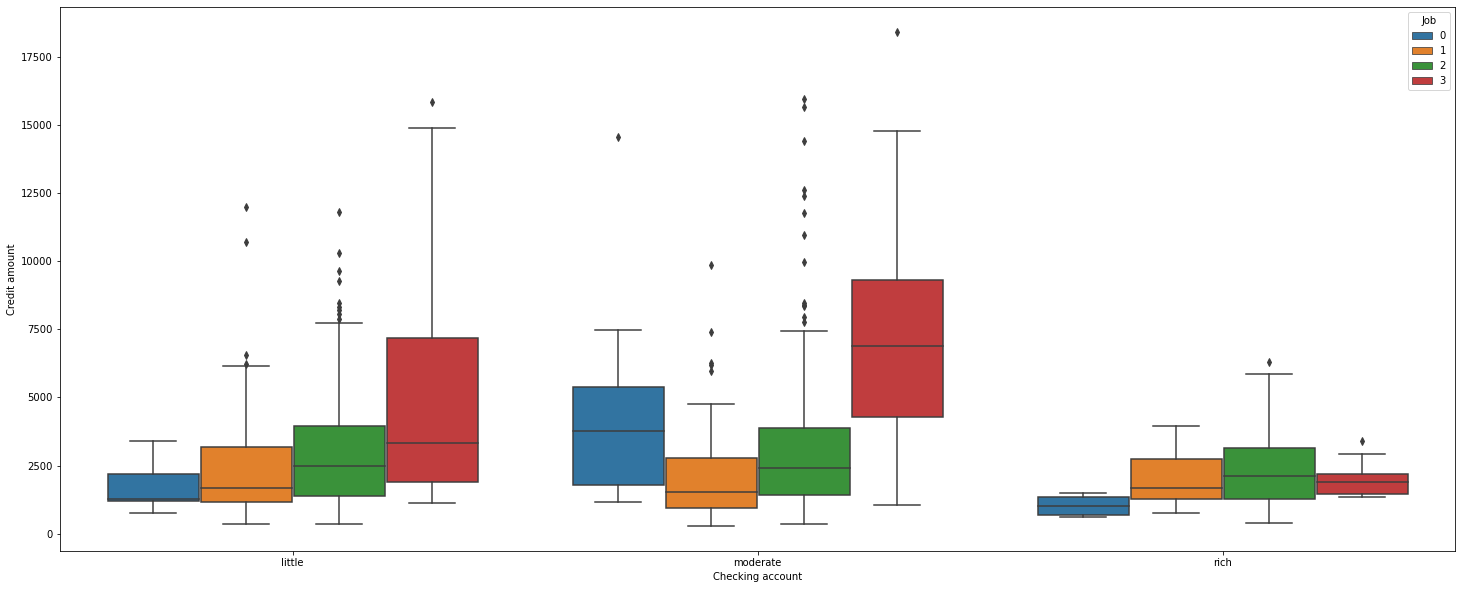

In [475]:
plt.figure(figsize=(25, 10))
ax = sns.boxplot(x="Checking account", y="Credit amount", hue='Job',data=german_credit)

<AxesSubplot:xlabel='Purpose', ylabel='Credit amount'>

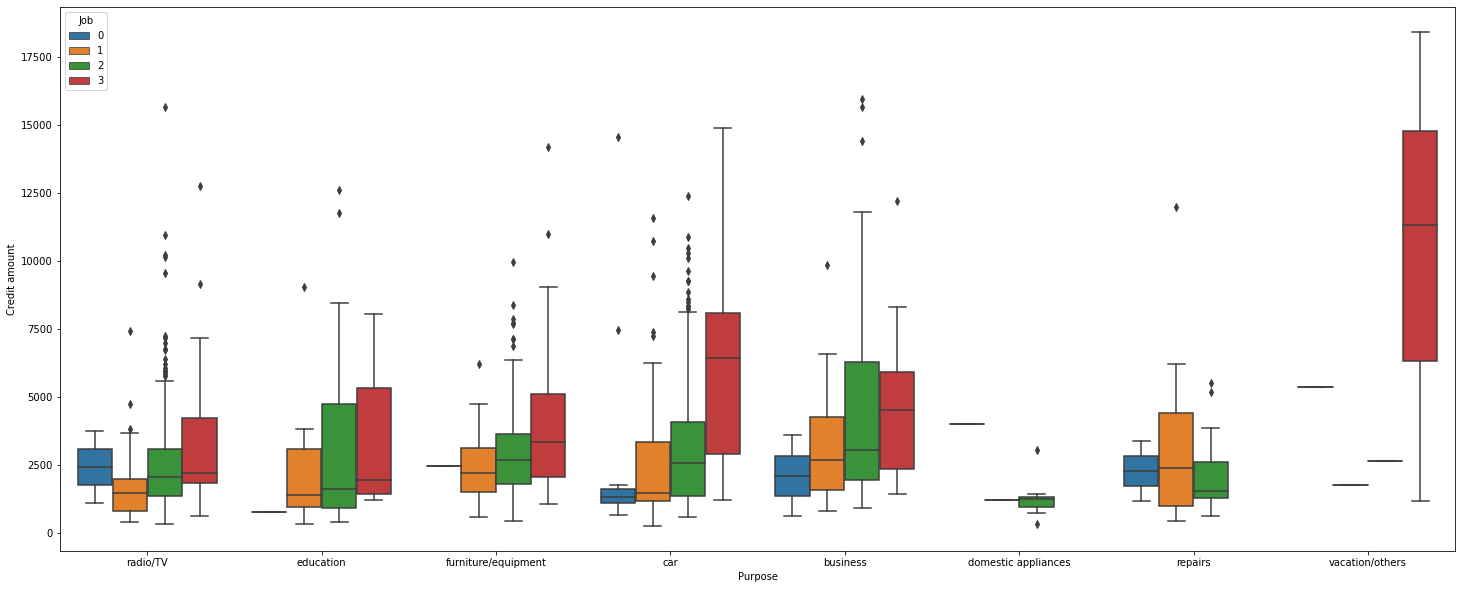

In [476]:
plt.figure(figsize=(25, 10))
sns.boxplot(x="Purpose", y="Credit amount", hue='Job', data=german_credit)

<AxesSubplot:xlabel='Credit amount', ylabel='Age'>

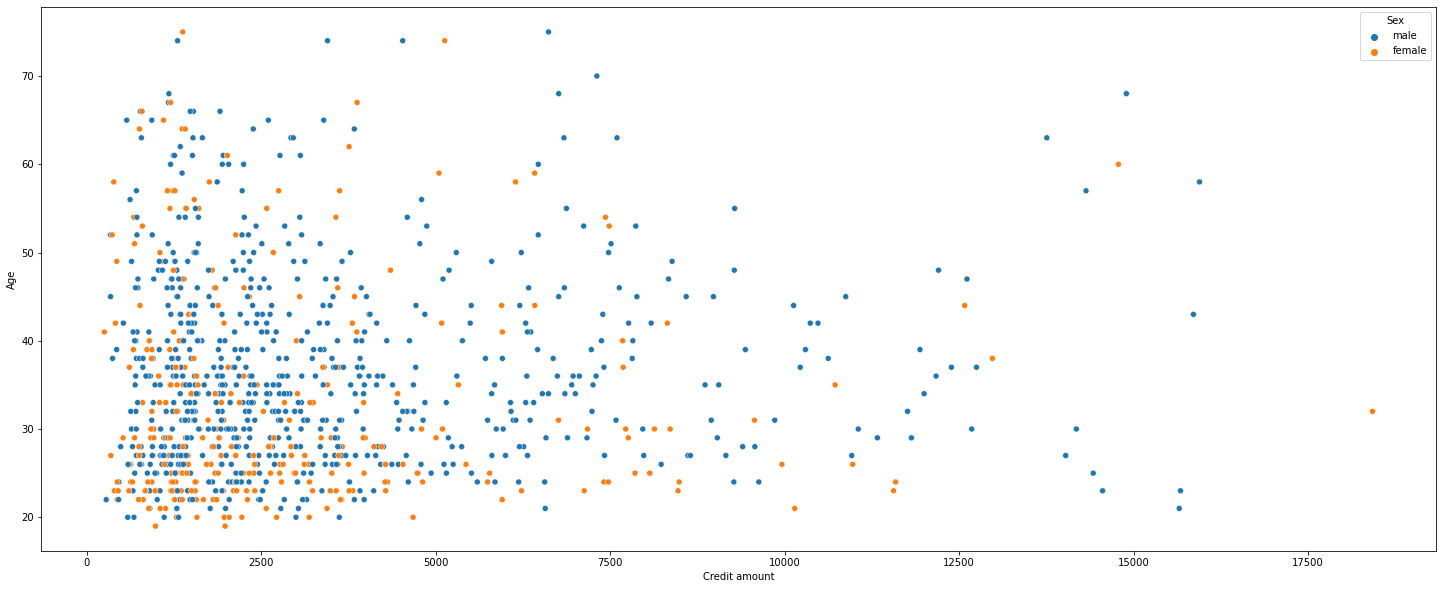

In [477]:
plt.figure(figsize=(25, 10))
sns.scatterplot(x="Credit amount", y="Age", hue='Sex', data=german_credit)

One Hot Encoding for categorical features

In [478]:
german_credit['Saving accounts'].fillna('other', inplace = True)
german_credit['Checking account'].fillna('other', inplace = True)

In [479]:
german_credit['Sex'] = german_credit['Sex'].map ({'male':1, 'female':0})
german_credit['Housing'] = german_credit['Housing'].map ({'free':1, 'own':0, 'rent':2})
german_credit['Saving accounts'] = german_credit['Saving accounts'].map ({'other':1, 'little':2, 'moderate':3, 'rich':4, 'quite rich':5})
german_credit['Checking account'] = german_credit['Checking account'].map ({'other':1, 'little':2, 'moderate':3, 'rich':4})
german_credit['Purpose'] = german_credit['Purpose'].map ({'car':1, 'radio/TV':2, 'furniture/equipment':3, 'business':4, 'education':5, 'repairs':6, 'vacation/others':7, 'domestic appliances':8})
german_credit['Risk'] = german_credit['Risk'].map ({'good':1, 'bad':0})
german_credit.head()
scaled_frame.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

<AxesSubplot:>

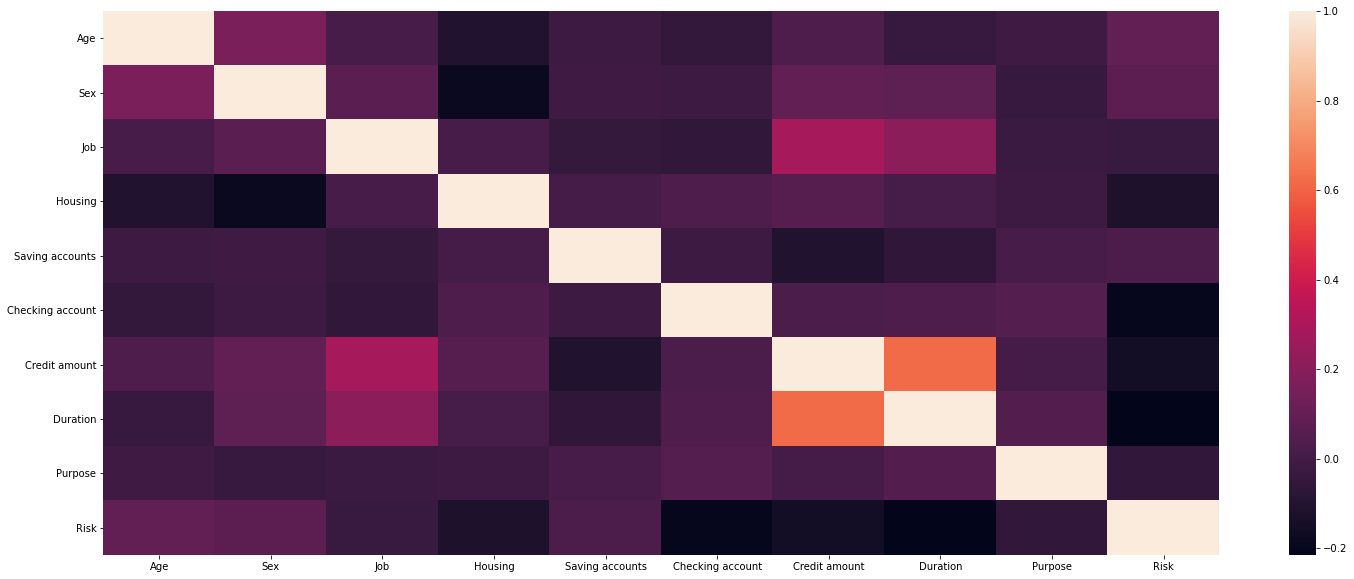

In [480]:
plt.figure(figsize=(25, 10))
sns.heatmap(german_credit.corr())

## Checking for skew in the numerical features and applying log transformation if necessary

<AxesSubplot:xlabel='Age'>

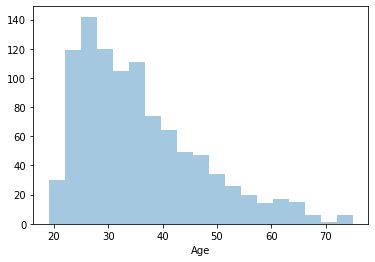

In [481]:
sns.distplot(german_credit["Age"], kde=False)

The histogram above for Age shows that there is skewness in data.

<AxesSubplot:xlabel='Age'>

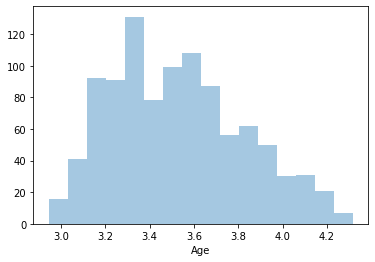

In [482]:
german_credit['Age']= np.log(german_credit['Age'])
sns.distplot(german_credit["Age"], kde=False)

<AxesSubplot:xlabel='Credit amount'>

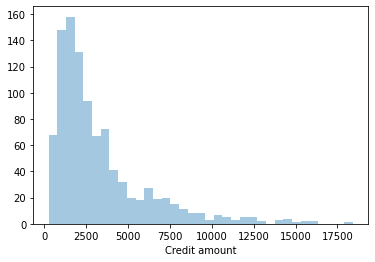

In [483]:
sns.distplot(german_credit["Credit amount"], kde=False)

The histogram above for Credit Amount shows that there is skewness in data.

<AxesSubplot:xlabel='Credit amount'>

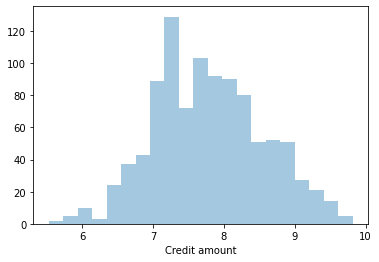

In [484]:
german_credit['Credit amount']= np.log(german_credit['Credit amount'])
sns.distplot(german_credit["Credit amount"], kde=False)

<AxesSubplot:xlabel='Duration'>

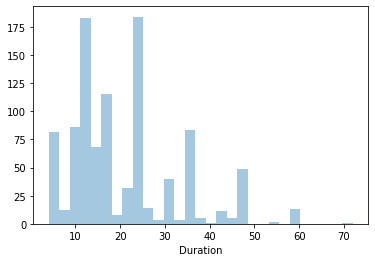

In [485]:
sns.distplot(german_credit["Duration"], kde=False)

The histogram above for Duration shows that there is skewness in data.

<AxesSubplot:xlabel='Duration'>

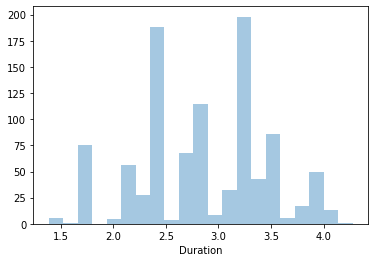

In [486]:
german_credit['Duration']= np.log(german_credit['Duration'])
sns.distplot(german_credit["Duration"], kde=False)

## Applying Standard Scaler

In [488]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(german_credit[['Age', 'Credit amount', 'Duration']])
scaled_frame = pd.DataFrame(X_scaled)

## Implementing KMeans Clustering and elbow method to find the number of cluster

Text(0, 0.5, 'kmeans_inertia')

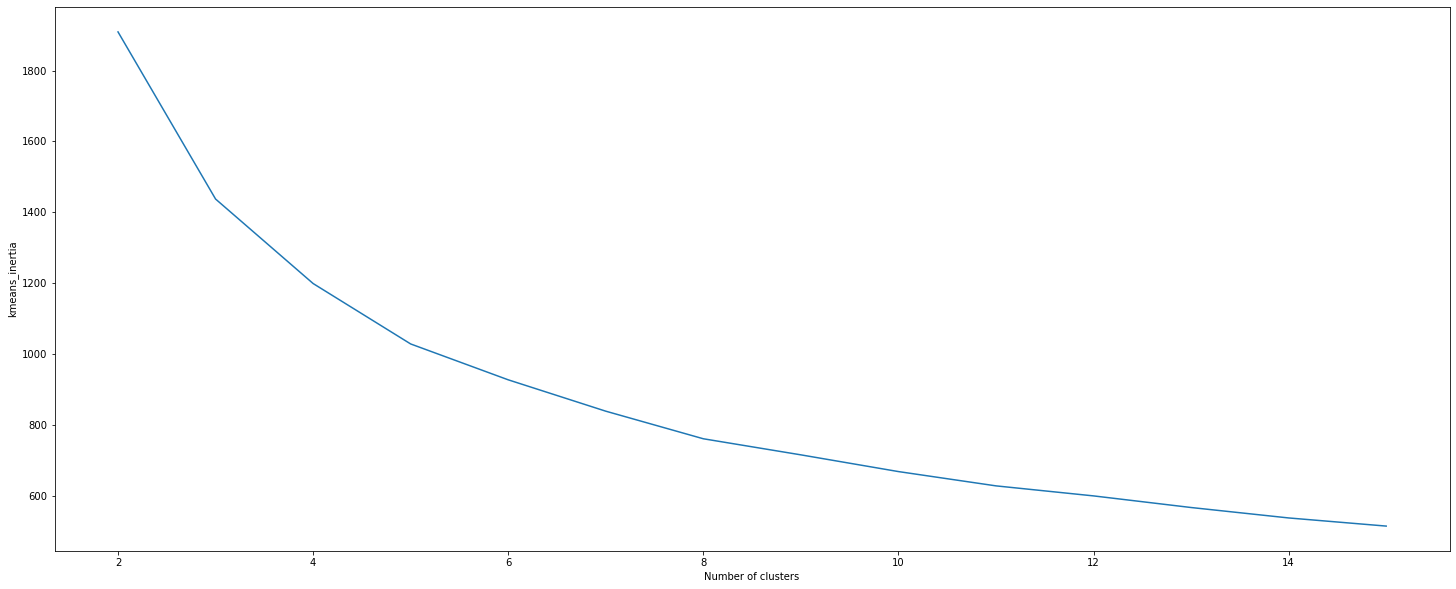

In [489]:
kmeans_inertia = []
for i in range(2, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_frame)
    kmeans_inertia.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_
plt.figure(figsize=(25, 10))
plt.plot(range(2, 16), kmeans_inertia)
plt.xlabel('Number of clusters')
plt.ylabel('kmeans_inertia')

From the above elbow curve, we can see that the optimal number of clusters is 4.

## PCA

In [435]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=400, n_init=100, random_state=0)
y_means = kmeans.fit(scaled_frame)
y_means

KMeans(max_iter=400, n_clusters=4, n_init=100, random_state=0)

Variance: [0.5408953  0.33457078 0.12453391]


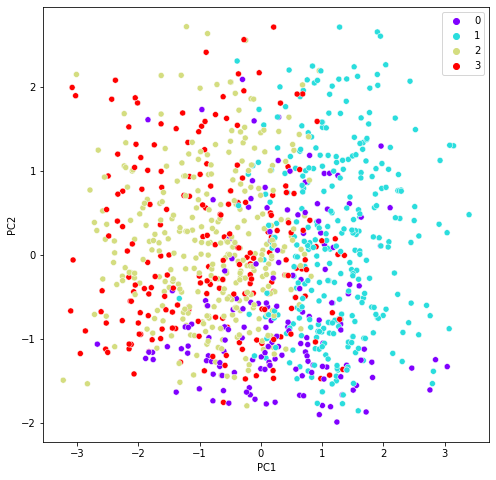

In [497]:
pca3 = PCA(n_components=3).fit(scaled_frame)
pca3d = pca3.transform(scaled_frame)

plt.figure(figsize = (8,8))
sns.scatterplot(pca3d[:,0], pca3d[:,1], 
                hue=y_means.labels_, palette = 'rainbow')
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

## Implementing KFold CV

In [498]:
X=german_credit.drop(columns = "Risk", axis = 1)
y=german_credit["Risk"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [499]:
model = RandomForestClassifier()
kfold = KFold(n_splits=5)

In [500]:
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %f" % (results.mean()*100))
Accuracy = results.mean()*100

Accuracy: 74.600000


In [501]:
PW = cross_val_score(model, X, y, cv=kfold, scoring='precision_weighted')
Rscore = cross_val_score(model, X, y, cv=kfold, scoring='recall_weighted')
Recall = Rscore.mean()*100
Precision = PW.mean()*100

f1score=2*((Recall*Precision)/(Recall+Precision))
print("Recall:%f, Precision:%f, f1score:%f" % (Recall,Precision,f1score))

Recall:73.900000, Precision:72.281050, f1score:73.081560
